In [10]:
import numpy as np
import pandas as pd
import json_lines
import os.path
from os import path
import csv
import matplotlib.pyplot as plt

In [171]:
if path.exists('GovPoliciesTweetsInfo.csv'):
    print("exists")
else:
    f = open('GovPoliciesTweetsInfo.csv', 'w', newline='')
    headerNames = ['TweetId', 'TweetCreatedAt', 'TweetText', 'TweetHashTags', 'TweetUserMentions', 'TweetRepliesCount', 'TweetRetweetCount', 'TweetFavoriteCount', 'IsRetweeted', 'UserId', 'UserScreenName', 'UserLocation', 'UserFollowersCount', 'UserFriendsCount']
    writer = csv.DictWriter(f, fieldnames = headerNames)
    writer.writeheader()
    f.close()

In [172]:
with open('GovPoliciesTweetsInfo.csv', 'r') as f:
    reader = csv.reader(f)
    i = next(reader)
    print(i)

['TweetId', 'TweetCreatedAt', 'TweetText', 'TweetHashTags', 'TweetUserMentions', 'TweetRepliesCount', 'TweetRetweetCount', 'TweetFavoriteCount', 'IsRetweeted', 'UserId', 'UserScreenName', 'UserLocation', 'UserFollowersCount', 'UserFriendsCount']


In [173]:
writeFile = open('GovPoliciesTweetsInfo.csv', 'a')
with open('tweetsData.jsonl', 'rb') as f:
    for tweet in json_lines.reader(f, broken=True):
        if i==1:
            break
        createdAt = str(tweet['created_at'])        
        tweetId = str(tweet['id_str'])
        
        if 'extended_tweet' in tweet:
            if 'full_text' in tweet['extended_tweet']:
                tweetText = str(tweet['extended_tweet']['full_text'])
            else:
                tweetText = str(tweet['text'])
        elif 'retweeted_status' in tweet:
            if 'extended_tweet' in tweet['retweeted_status']:
                if 'full_text' in tweet['retweeted_status']['extended_tweet']:
                    tweetText = str(tweet['retweeted_status']['extended_tweet']['full_text'])
                else:
                    tweetText = str(tweet['text'])
            else:
                tweetText = str(tweet['text'])
        else:
            tweetText = str(tweet['text'])
            
        tweetHashTags = ''
        usersMentions = ''
        
        userMentionsSet = set()
        hashtagsSet = set()
        
        if 'extended_tweet' in tweet:
            if 'entities' in tweet['extended_tweet']:
                if 'hashtags' in tweet['extended_tweet']['entities']:
                    for htObj in tweet['extended_tweet']['entities']['hashtags']:
                        hashtagsSet.add(str(htObj['text']))
                if 'user_mentions' in tweet['extended_tweet']['entities']:
                    for umObj in tweet['extended_tweet']['entities']['user_mentions']:
                        userMentionsSet.add(str(umObj['screen_name']))
        elif 'retweeted_status' in tweet:
            if 'extended_tweet' in tweet['retweeted_status']:
                if 'entities' in tweet['retweeted_status']['extended_tweet']:
                    if 'hashtags' in tweet['retweeted_status']['extended_tweet']['entities']:
                        for htObj in tweet['retweeted_status']['extended_tweet']['entities']['hashtags']:
                            hashtagsSet.add(str(htObj['text']))
                    if 'user_mentions' in tweet['retweeted_status']['extended_tweet']['entities']:
                        for umObj in tweet['retweeted_status']['extended_tweet']['entities']['user_mentions']:
                            userMentionsSet.add(str(umObj['screen_name']))
            if 'entities' in tweet:
                if 'hashtags' in tweet['entities']:
                    for htObj in tweet['entities']['hashtags']:
                        hashtagsSet.add(str(htObj['text']))
                if 'user_mentions' in tweet['entities']:
                    for umObj in tweet['entities']['user_mentions']:
                        userMentionsSet.add(str(umObj['screen_name']))
        else:
            if 'entities' in tweet:
                if 'hashtags' in tweet['entities']:
                    for htObj in tweet['entities']['hashtags']:
                        hashtagsSet.add(str(htObj['text']))
                if 'user_mentions' in tweet['entities']:
                    for umObj in tweet['entities']['user_mentions']:
                        userMentionsSet.add(str(umObj['screen_name']))
        
        if len(hashtagsSet) > 0:
            tweetHashTags = ', '.join(hashtagsSet)
        
        if len(userMentionsSet) > 0:
            usersMentions = ', '.join(userMentionsSet)
                                        
        repliesCount = str(tweet['reply_count'])       
        retweetCount = str(tweet['retweet_count'])       
        favoriteCount = str(tweet['favorite_count'])
        isRetweeted = str(tweet['retweeted'])
        if isRetweeted == 'False':
            isRetweeted = str(0)
        else:
            isRetweeted = str(1)
        userid = str(tweet['user']['id_str'])     
        userScreenName = str(tweet['user']['screen_name'])
        userLocation = str(tweet['user']['location'])       
        userFollowersCount = str(tweet['user']['followers_count'])
        userFriendsCount = str(tweet['user']['friends_count'])
        
        entities = tweetId + "\t" + createdAt + "\t" + tweetText + "\t" + tweetHashTags + "\t" + usersMentions + "\t" + repliesCount + "\t" + retweetCount + "\t" + favoriteCount + "\t" + isRetweeted + "\t" + userid + "\t" + userScreenName + "\t" + userLocation + "\t" + userFollowersCount + "\t" + userFriendsCount
        entities = entities.split("\t")                 
        writer = csv.writer(writeFile)
        writer.writerows([entities])

    writeFile.close()
         

In [174]:
df = pd.read_csv('GovPoliciesTweetsInfo.csv')
# print(df['TweetUserMentions'][3])
df

,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,IsRetweeted,UserId,UserScreenName,UserLocation,UserFollowersCount,UserFriendsCount
0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,0,17874576,rikleaf,Coast Salish Territory,891,1724
1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545
2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,0,2228944681,anamarialopezmd,"Philadelphia, PA",1231,511
3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,0,1000393403337764864,angel7WPS,"Fort Worth, TX",249,699
4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,0,993616585809190912,pavel_payne,None,83,167
29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,0,173976650,hotjetset,United States,262,468
29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,0,173976650,hotjetset,United States,262,468
29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,0,3290307887,abajaj033,None,21,254


In [175]:
def checkIfWHOExist(x):
    if 'WHO' in str(x):
        return str(1)
    else:
        return str(0);
    
df['isWHO'] = df['TweetUserMentions'].apply(checkIfWHOExist)

In [176]:
def checkIfCDCgovExist(x):
    if 'CDCgov' in str(x):
        return str(1)
    else:
        return str(0);
    
df['isCDCgov'] = df['TweetUserMentions'].apply(checkIfCDCgovExist)

In [177]:
df

,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,IsRetweeted,UserId,UserScreenName,UserLocation,UserFollowersCount,UserFriendsCount,isWHO,isCDCgov
0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,0,17874576,rikleaf,Coast Salish Territory,891,1724,0,1
1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1
2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,0,2228944681,anamarialopezmd,"Philadelphia, PA",1231,511,0,1
3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,0,1000393403337764864,angel7WPS,"Fort Worth, TX",249,699,0,1
4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,0,993616585809190912,pavel_payne,None,83,167,0,0
29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,0,173976650,hotjetset,United States,262,468,0,0
29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,0,173976650,hotjetset,United States,262,468,0,0
29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,0,3290307887,abajaj033,None,21,254,0,0


In [178]:
def checkIfRealDonaldExist(x):
    if 'realDonaldTrump' in str(x):
        return str(1)
    else:
        return str(0);
    
df['isDonaldTrump'] = df['TweetUserMentions'].apply(checkIfRealDonaldExist)

In [179]:
df

,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,IsRetweeted,UserId,UserScreenName,UserLocation,UserFollowersCount,UserFriendsCount,isWHO,isCDCgov,isDonaldTrump
0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,0,17874576,rikleaf,Coast Salish Territory,891,1724,0,1,1
1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0
2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,0,2228944681,anamarialopezmd,"Philadelphia, PA",1231,511,0,1,0
3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,0,1000393403337764864,angel7WPS,"Fort Worth, TX",249,699,0,1,1
4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,0,993616585809190912,pavel_payne,None,83,167,0,0,0
29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,0,173976650,hotjetset,United States,262,468,0,0,0
29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,0,173976650,hotjetset,United States,262,468,0,0,0
29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,0,3290307887,abajaj033,None,21,254,0,0,0


In [180]:
def checkIfCDCEmergencyExist(x):
    if 'CDCemergency' in str(x):
        return str(1)
    else:
        return str(0);
    
df['isCDCEmergency'] = df['TweetUserMentions'].apply(checkIfCDCEmergencyExist)

In [181]:
df

,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,IsRetweeted,UserId,UserScreenName,UserLocation,UserFollowersCount,UserFriendsCount,isWHO,isCDCgov,isDonaldTrump,isCDCEmergency
0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,0,17874576,rikleaf,Coast Salish Territory,891,1724,0,1,1,0
1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0,0
2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,0,2228944681,anamarialopezmd,"Philadelphia, PA",1231,511,0,1,0,0
3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,0,1000393403337764864,angel7WPS,"Fort Worth, TX",249,699,0,1,1,1
4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,0,993616585809190912,pavel_payne,None,83,167,0,0,0,0
29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,0,173976650,hotjetset,United States,262,468,0,0,0,0
29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,0,173976650,hotjetset,United States,262,468,0,0,0,0
29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,0,3290307887,abajaj033,None,21,254,0,0,0,0


In [182]:
def checkIfNIAIDNewsExist(x):
    if 'NIAIDNews' in str(x):
        return str(1)
    else:
        return str(0);
    
df['isNIAIDNews'] = df['TweetUserMentions'].apply(checkIfNIAIDNewsExist)

In [183]:
df

,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,IsRetweeted,UserId,UserScreenName,UserLocation,UserFollowersCount,UserFriendsCount,isWHO,isCDCgov,isDonaldTrump,isCDCEmergency,isNIAIDNews
0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,0,17874576,rikleaf,Coast Salish Territory,891,1724,0,1,1,0,0
1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0,0,0
2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,0,2228944681,anamarialopezmd,"Philadelphia, PA",1231,511,0,1,0,0,0
3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,0,1000393403337764864,angel7WPS,"Fort Worth, TX",249,699,0,1,1,1,0
4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,0,993616585809190912,pavel_payne,None,83,167,0,0,0,0,0
29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,0,173976650,hotjetset,United States,262,468,0,0,0,0,0
29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,0,173976650,hotjetset,United States,262,468,0,0,0,0,0
29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,0,3290307887,abajaj033,None,21,254,0,0,0,0,0


In [184]:
def checkIfV2019NExist(x):
    if 'V2019N' in str(x):
        return str(1)
    else:
        return str(0);
    
df['IsV2019N'] = df['TweetUserMentions'].apply(checkIfV2019NExist)

In [185]:
df

,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,IsRetweeted,UserId,UserScreenName,UserLocation,UserFollowersCount,UserFriendsCount,isWHO,isCDCgov,isDonaldTrump,isCDCEmergency,isNIAIDNews,IsV2019N
0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,0,17874576,rikleaf,Coast Salish Territory,891,1724,0,1,1,0,0,0
1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0,0,0,0
2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,0,2228944681,anamarialopezmd,"Philadelphia, PA",1231,511,0,1,0,0,0,0
3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,0,1000393403337764864,angel7WPS,"Fort Worth, TX",249,699,0,1,1,1,0,0
4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,0,1023300683133534212,kybellcountydem,"Bell County, Kentucky",227,545,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,0,993616585809190912,pavel_payne,None,83,167,0,0,0,0,0,1
29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,0,173976650,hotjetset,United States,262,468,0,0,0,0,0,1
29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,0,173976650,hotjetset,United States,262,468,0,0,0,0,0,1
29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,0,3290307887,abajaj033,None,21,254,0,0,0,0,0,1


In [186]:
# print(df['TweetText'][3])
df.to_csv('GovPoliciesTweetsDataWithIsGovID.csv')

In [187]:
govIDData = pd.read_csv('GovPoliciesTweetsDataWithIsGovID.csv')
govIDData['date'] = pd.to_datetime(govIDData['TweetCreatedAt'].astype(str), errors='coerce')
govIDData['date'] = pd.to_datetime(govIDData['date'])
govIDData['date'] = govIDData['date'].dt.strftime('%m/%d/%Y') #changes datetime format to object(string)
govIDData['date'] = pd.to_datetime(govIDData['date'], format='%m/%d/%Y', errors='coerce')  
govIDData.to_csv('GovPoliciesTweetsWithDate.csv')

In [3]:
govdf = pd.read_csv('GovPoliciesTweetsWithDate.csv')
govdf

,Unnamed: 0,Unnamed: 0.1,TweetId,TweetCreatedAt,TweetText,TweetHashTags,TweetUserMentions,TweetRepliesCount,TweetRetweetCount,TweetFavoriteCount,...,UserLocation,UserFollowersCount,UserFriendsCount,isWHO,isCDCgov,isDonaldTrump,isCDCEmergency,isNIAIDNews,IsV2019N,date
0,0,0,1244776398759309312,Mon Mar 30 23:59:54 +0000 2020,STOP Daily @WhiteHouse TV🤥@realdonaldTrump @PO...,"Coronavirus, COVID19","PressSec, seanhannity, JudgeJeanine, MSNBC, fe...",0,0,0,...,Coast Salish Territory,891,1724,0,1,1,0,0,0,2020-03-30
1,1,1,1244776394388844545,Mon Mar 30 23:59:53 +0000 2020,.@CDCMMWR study screened older patients in ski...,COVID19,"CDCgov, CDCMMWR",0,0,0,...,"Bell County, Kentucky",227,545,0,1,0,0,0,0,2020-03-30
2,2,2,1244776392316915712,Mon Mar 30 23:59:53 +0000 2020,Pre-symptomatic #COVIDー19 examined @CDCgov. In...,COVIDー19,"carrie_byington, CDCgov",0,0,0,...,"Philadelphia, PA",1231,511,0,1,0,0,0,0,2020-03-30
3,3,3,1244776358011645952,Mon Mar 30 23:59:45 +0000 2020,🔥🔥HELP 🔥🔥\nme get this message to the Presiden...,"RT, TheFive, CIGNA","CDCemergency, seanhannity, realDonaldTrump, db...",0,0,0,...,"Fort Worth, TX",249,699,0,1,1,1,0,0,2020-03-30
4,4,4,1244776343889498113,Mon Mar 30 23:59:41 +0000 2020,Asymptomatic and pre-symptomatic nursing home ...,NaN,CDCgov,0,0,0,...,"Bell County, Kentucky",227,545,0,1,0,0,0,0,2020-03-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,29186,29186,1242474479529250816,Tue Mar 24 15:32:54 +0000 2020,@StopkaPavel @JindraBrejcha @V2019N Here's an ...,NaN,"StopkaPavel, JindraBrejcha, V2019N",1,0,2,...,None,83,167,0,0,0,0,0,1,2020-03-24
29187,29187,29187,1242474155586531328,Tue Mar 24 15:31:37 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N, hotjetset",0,0,0,...,United States,262,468,0,0,0,0,0,1,2020-03-24
29188,29188,29188,1242472869264871424,Tue Mar 24 15:26:30 +0000 2020,"@HeidiNBC @V2019N Calm down NY has 25,000 who ...",NaN,"HeidiNBC, V2019N",0,1,0,...,United States,262,468,0,0,0,0,0,1,2020-03-24
29189,29189,29189,1242466239609311233,Tue Mar 24 15:00:10 +0000 2020,A new global platform to keep information netw...,NaN,"strongernetwork, V2019N, ITU, Safernetwork",0,0,0,...,None,21,254,0,0,0,0,0,1,2020-03-24


In [6]:
govdf['date'].value_counts()

2020-03-30    16136
2020-03-26     2560
2020-03-27     2425
2020-03-29     1847
2020-03-25     1756
              ...  
2020-02-21        1
2020-01-02        1
2020-01-10        1
2020-01-21        1
2020-01-11        1
Name: date, Length: 79, dtype: int64

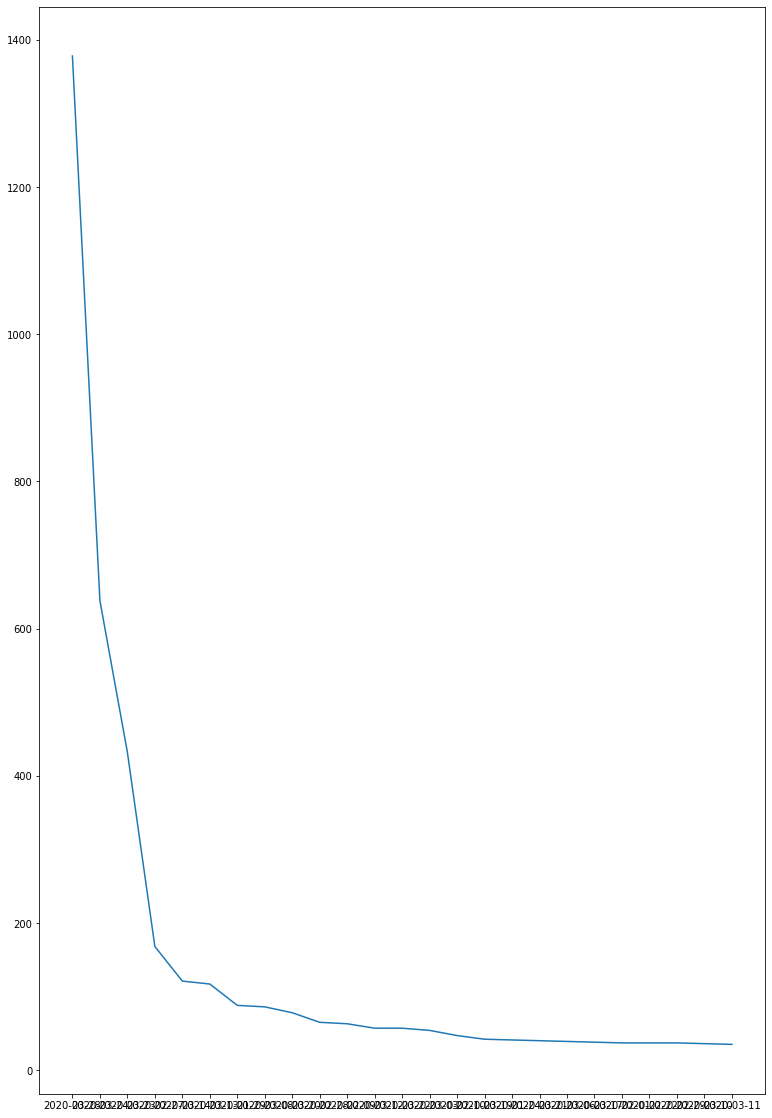

In [16]:
plt.figure(figsize=(13,20))
plt.plot(govdf['date'].value_counts().index[5:30], govdf['date'].value_counts()[5:30])